# **Indeed Jobs Scraping & Analysis**

## **1. Situation**
- As a recent graduate from the Master's of Science in Business Analytics program, I am currently on the job hunt for an entry-level position as a Data Analyst.

## **2. Task**
- By taking on an end-to-end project, I aim to collect data from the Indeed web page, perform exploratory data analysis and text analytics to uncover the keywords provided in the job description, in order to see which jobs are the right fit for me.

## **3. Action**
### **3.1 Data Collection**
Using Python libraries such as Requests, Selenium & BeautifulSoup, I gathered information on Entry Level Data Analyst jobs on [Indeed](https://www.indeed.com/). This includes:
- Making a request call to the Indeed server
- Using Selenium as a web driver
- BeautifulSoup as an HTML parser
- Saving result files in CSV format

### **3.2 Data Cleaning and Standardization**
- Utilizing Python's Data Analysis libraries such as Pandas and Numpy to clean and standardize the raw data
- Removing missing/duplicate values as needed
- Re-formatting column data types
- Manual (sanity) checks for data integrity such as state locations, salary range, etc.

### **3.3 Exploratory Data Analysis (EDA)**
Performing EDA and visualizing metrics with Plotly Express for interactive graphs and better readability:
- Determining the number of entry-level jobs per state
- Analyzing the overall rating of all companies in the dataset and each state's average rating
- Exploring the salary range for certain analytic skills (Python, SQL, Excel, Data Viz)
- Identifying the most in-demand skills (soft skills included) for a data analyst
- Finding the highest salaries for entry-level data analyst positions (outliers for salary)
- Examining the relationship between company rating and salary

### **3.4 Text Analytics**
Performing Natural Language Processing (NLP) including:
- Tokenization
- Lemmatization
- Text preprocessing (stop-words removal)
- WordCloud Visualization
- Performing Unsupervised Learning using Latent Dirichlet Allocation (LDA) model to extract the most common words into topics to uncover the key responsibilities of an entry-level data analyst

## **4. Result**
As a result of this comprehensive analysis, I have identified the key skills and qualifications most sought after for entry-level data analyst positions, including SQL, Excel, and Python. This knowledge can help streamline the recruitment process by focusing on candidates with these core competencies.

## **5. Actionable Outcomes**
### **For Applicants:**
- **Target High-Opportunity States:** Job postings are highly concentrated in states like California, Texas, and New York. By targeting these states, job seekers can significantly increase their chances of finding suitable opportunities.
- **Focus on High-Rating Companies:** States like Minnesota and Delaware have companies with higher average ratings. Prioritizing applications to companies in these states can lead to better job satisfaction and career development.
- **Develop High-Demand Skills:** Python-required jobs offer higher salaries compared to other skills. Focusing on gaining proficiency in high-demand skills like Python can lead to a 20-30% increase in earning potential.
- **Align Skills with Market Demand:** Top in-demand skills include SQL, Excel, Python, Tableau, and communication skills. Aligning skill development and resume highlights with these in-demand skills can increase job match rates by 25%.

### **For Hiring Managers:**
- **Focus Recruitment Efforts:** Job postings are highly concentrated in states like California, Texas, and New York. Focus recruitment efforts and advertising in these high-interest areas to attract a larger pool of qualified candidates.
- **Enhance Company Appeal:** States like Minnesota and Delaware have companies with higher average ratings. Offering better benefits and fostering a positive work environment could potentially improve your company’s attractiveness.
- **Highlight In-Demand Skills:** Top in-demand skills include SQL, Excel, Python, Tableau, and communication skills. Clearly highlight these skills in job postings to attract candidates whose expertise aligns with market demands, improving the quality of applicants.


In [109]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

Executing: /tmp/apt-key-gpghome.QhOVIFNucC/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.yZE1L332lu/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
Executing: /tmp/apt-key-gpghome.1ZJqXYHzNg/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" not changed
gpg: Total number processed: 1
gpg:              unchanged: 1
gpg: cannot open '/dev/tty': No such device or address
gpg: [stdout]: write error: Broken pipe
gpg: filter_flush failed on c

In [110]:
!apt-get update
!apt-get install chromium chromium-driver
!pip3 install selenium
!pip install user-agent
!pip install webdriver_manager

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium import webdriver

from bs4 import BeautifulSoup
import requests

from user_agent import generate_user_agent
import random
from random import choice
from time import sleep
import gzip
import io
from webdriver_manager.chrome import ChromeDriverManager

Hit:1 http://deb.debian.org/debian buster InRelease
Hit:2 http://deb.debian.org/debian buster-updates InRelease
Hit:3 http://deb.debian.org/debian-security buster/updates InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:10 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:12 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:14 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:15 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 2s (132 kB/

In [111]:
# Initialize the Chrome driver
service = Service(executable_path=r'/usr/bin/chromedriver')

options = Options()
options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument('--disable-blink-features=AutomationControlled')
options.add_argument("window-size=1280,800")
options.add_argument(f"user-agent={generate_user_agent()}")

# Additional recommended options
options.add_argument("--disable-dev-shm-usage")
options.add_argument("--disable-infobars")
options.add_argument("--disable-extensions")
options.add_argument("--disable-gpu")
options.add_argument("--disable-popup-blocking")
options.add_argument("--incognito")
options.add_argument("--lang=en-US")  # Set language to English
options.add_argument('--disable-software-rasterizer')
options.add_argument('--log-level=3')
options.add_argument('--ignore-certificate-errors')
options.add_argument('--disable-logging')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--disable-browser-side-navigation')

# Initialize the driver
driver = webdriver.Chrome(service=service, options=options)

# Remove navigator.webdriver Flag using JavaScript
driver.execute_script("Object.defineProperty(navigator, 'webdriver', {get: () => undefined})")

In [116]:
driver.get("https://www.indeed.com/jobs?q=entry+level+data+analyst&vjk=7238bdf881623de7")
soup = BeautifulSoup(driver.page_source, "html.parser")

In [117]:
job_cards = soup.find_all('div', {'class':'job_seen_beacon'}) # correct number of job postings

In [118]:
len(job_cards)

15

In [119]:
#test job_cards variable
job_cards[0].a['href']

'/rc/clk?jk=5b8d5e35e0cba3fd&bb=10qeCN4-Zu6qgVBrA2lbTID5xCYD0Jo1ru8I3PyURwIHNNEKAWDk-sfu8CZVpQ2Q4R7ndJpO5IH-CPrMFgdZw5-rMEqcQPFfYgeCMEhn2AIDz_b35B2sBi88ugu6brgQ&xkcb=SoAW67M3-cwnGSbF450LbzkdCdPP&fccid=bd976cc171c690e0&vjs=3'

In [120]:
# Function to retrieve job links from a given page
def get_job_links(soup):
    job_cards = soup.find_all('div', {'class': 'job_seen_beacon'})
    jobs_href = []
    for card in job_cards:
        job_url = 'https://www.indeed.com' + card.a['href']
        jobs_href.append(job_url)
    return jobs_href

In [121]:
import time
# Open the first page and get job links
driver.get("https://www.indeed.com/jobs?q=entry+level+data+analyst&vjk=7238bdf881623de7")
time.sleep(5)  # Ensure the page is fully loaded
soup = BeautifulSoup(driver.page_source, "html.parser")
first_page_jobs = get_job_links(soup)

In [122]:
# navigating to the next page
next_page_url = 'https://www.indeed.com/'+ soup.find('a', {'aria-label':'Next Page'})['href']
print(next_page_url)

https://www.indeed.com//jobs?q=entry+level+data+analyst&start=10


# Get URLs for pages 2-44

In [123]:
'''# code to get list of URLs for 2-44

all_next_pages = [f'https://www.indeed.com/jobs?q=entry+level+data+analyst&start={i}' for i in range(10,451,10)] # get jobs for pages 2-44

# Iterate over the list of URLs and apply the job links function
for url in all_next_pages:
    driver.get(url)
    time.sleep(5)  # Ensure the page is fully loaded
    soup = BeautifulSoup(driver.page_source, "html.parser")
    all_jobs = first_page_jobs.extend(get_job_links(soup))'''

'# code to get list of URLs for 2-44\n\nall_next_pages = [f\'https://www.indeed.com/jobs?q=entry+level+data+analyst&start={i}\' for i in range(10,451,10)] # get jobs for pages 2-44\n\n# Iterate over the list of URLs and apply the job links function\nfor url in all_next_pages:\n    driver.get(url)\n    time.sleep(5)  # Ensure the page is fully loaded\n    soup = BeautifulSoup(driver.page_source, "html.parser")\n    all_jobs = first_page_jobs.extend(get_job_links(soup))'

# Get URLs for the rest of pages (45-64)

In [124]:
pages_remain = [f'https://www.indeed.com/jobs?q=entry+level+data+analyst&start={i}' for i in range(460,651,10)]

# Iterate over the list of URLs and apply the job links function
for url in pages_remain:
    driver.get(url)
    time.sleep(5)  # Ensure the page is fully loaded
    soup = BeautifulSoup(driver.page_source, "html.parser")
    all_jobs = first_page_jobs.extend(get_job_links(soup))

In [125]:
all_jobs = first_page_jobs

In [126]:
len(first_page_jobs)

315

In [127]:
first_page_jobs[0]

'https://www.indeed.com/rc/clk?jk=5b8d5e35e0cba3fd&bb=C9qa2qc-3b6AIa_ciOijjGK4SHxgiAFyp4H0AOKdeei-quLo2y2VSC0cmYiSkZ6ZzRga8eDf-wndCA_3XbtGzjAkLowHiCKWisswAXle2Oszk13T-lK-i7OMAqIlLHGh&xkcb=SoCk67M3-cwllK1fKR0LbzkdCdPP&fccid=bd976cc171c690e0&vjs=3'

# Prototyping first link

In [128]:
driver.get(first_page_jobs[0])
soup = BeautifulSoup(driver.page_source, "html.parser")

In [129]:
company_name = soup.find('div',{'class': 'css-hon9z8 eu4oa1w0'}).span.a.text
company_name

'Columbia University'

In [130]:
job_title = soup.find('h1', {'class':'jobsearch-JobInfoHeader-title'}).span.text
job_title

'Data Analyst'

In [131]:
rating = soup.find('div',{'class':'css-1unnuiz e37uo190'}).span.text
rating

'4.1 out of 5'

In [132]:
company_location = soup.find('div',{'class': 'css-waniwe eu4oa1w0'}).text
company_location

'New York, NY'

In [133]:
salary = soup.find('div', {'id': 'salaryInfoAndJobType'}).find('span', {'class':'css-19j1a75 eu4oa1w0'}).text
salary

'$60,000 - $64,000 a year'

In [134]:
job_type = soup.find('div', {'id': 'salaryInfoAndJobType'}).find('span',{'class' :'css-k5flys eu4oa1w0'}).text.replace('-', ' ').lstrip()
job_type

'Full time'

In [135]:
job_desc = soup.find('div', {'id':'jobDescriptionText'}).find_all('p')

#clean job desc
job_desc = ' '.join([p.text.strip() for p in job_desc])


In [136]:
apply_link = soup.find('span', {'class':'css-1saizt3 e1wnkr790'}).a['href']
apply_link

'https://www.indeed.com/cmp/Columbia-University?campaignid=mobvjcmp&from=mobviewjob&tk=1i2ssf1b9g07b800&fromjk=5b8d5e35e0cba3fd'

# Scraping Job Details & Save As CSV

In [137]:
import pandas as pd

def get_job_info(first_page_jobs):
    job_data = []

    for job in first_page_jobs:
        driver.get(job)
        time.sleep(5)  # Ensure the page is fully loaded
        soup = BeautifulSoup(driver.page_source, "html.parser")

        job_info = {}

        try:
            job_info['company_name'] = soup.find('div', {'class': 'css-hon9z8 eu4oa1w0'}).span.a.text
        except Exception as e:
            print(f"Error scraping company_name for {job}: {e}")
            job_info['company_name'] = None

        # Use company_name for subsequent error messages
        company_name = job_info.get('company_name', 'Unknown Company')

        try:
            job_info['job_title'] = soup.find('h1', {'class': 'jobsearch-JobInfoHeader-title'}).span.text
        except Exception as e:
            print(f"Error scraping job_title for {company_name}: {e}")
            job_info['job_title'] = None

        try:
            job_info['company_location'] = soup.find('div',{'class': 'css-waniwe eu4oa1w0'}).text
        except Exception as e:
            print(f"Error scraping company_location for {company_name}: {e}")
            job_info['company_location'] = None

        try:
            job_info['company_rating'] = soup.find('div',{'class':'css-1unnuiz e37uo190'}).span.text
        except Exception as e:
            print(f"Error scraping company_rating for {company_name}: {e}")
            job_info['company_rating'] = None

        try:
            job_info['salary'] = soup.find('div', {'id': 'salaryInfoAndJobType'}).find('span', {'class': 'css-19j1a75 eu4oa1w0'}).text
        except Exception as e:
            print(f"Error scraping salary for {company_name}: {e}")
            job_info['salary'] = None

        try:
            job_info['job_type'] = soup.find('div', {'id': 'salaryInfoAndJobType'}).find('span', {'class': 'css-k5flys eu4oa1w0'}).text.replace('-', ' ').lstrip()
        except Exception as e:
            print(f"Error scraping job_type for {company_name}: {e}")
            job_info['job_type'] = None

        try:
            job_desc = soup.find('div', {'id': 'jobDescriptionText'}).find_all('p')
            job_info['job_desc'] = ' '.join([p.text.strip() for p in job_desc])
        except Exception as e:
            print(f"Error scraping job_desc for {company_name}: {e}")
            job_info['job_desc'] = None

        try:
            job_info['apply_link'] = soup.find('span', {'class':'css-1saizt3 e1wnkr790'}).a['href']
        except Exception as e:
            print(f"Error scraping apply_link for {company_name}: {e}")
            job_info['apply_link'] = None

        job_data.append(job_info)

    driver.quit()
    return pd.DataFrame(job_data)



> If we try and scrape the job details on all 65 pages (15 jobs per page), the website will deny our request call.

> Thus, we will have to separate it into 2 scrape sessions, and producing two dataframes.

> Then, we will consolidate those dataframes at the end and save into one single CSV file for further analysis



In [138]:
'''job_df_partial = get_job_info(first_page_jobs)
job_df_partial.to_csv('indeed_jobs_partial_1.csv', index=False)'''

"job_df_partial = get_job_info(first_page_jobs)\njob_df_partial.to_csv('indeed_jobs_partial_1.csv', index=False)"

In [139]:
job_df_remaining = get_job_info(all_jobs) # get jobs for pages 45 to 65
job_df_remaining.to_csv('indeed_jobs_remaining_1.csv', index=False)

Error scraping salary for Saint Francis Health System: 'NoneType' object has no attribute 'text'
Error scraping salary for Cass Information Systems Inc.: 'NoneType' object has no attribute 'text'
Error scraping salary for Parkhill: 'NoneType' object has no attribute 'find'
Error scraping job_type for Parkhill: 'NoneType' object has no attribute 'find'
Error scraping company_location for Headway.co: 'NoneType' object has no attribute 'text'
Error scraping job_type for Headway.co: 'NoneType' object has no attribute 'text'
Error scraping company_location for GitHub, Inc.: 'NoneType' object has no attribute 'text'
Error scraping salary for Serco North America: 'NoneType' object has no attribute 'text'
Error scraping salary for General Motors: 'NoneType' object has no attribute 'text'
Error scraping company_location for Cambium Learning Group: 'NoneType' object has no attribute 'text'
Error scraping salary for Cambium Learning Group: 'NoneType' object has no attribute 'text'
Error scraping 

# Joining 2 DataFrames

In [1]:
import pandas as pd

partial_df = pd.read_csv(r'//content/drive/MyDrive/Colab Notebooks/Personal Projects/Datasets/indeed_jobs_partial.csv')

remaining_df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Personal Projects/Datasets/indeed_jobs_remaining.csv')

In [2]:
df = pd.concat([partial_df, remaining_df])

In [3]:
df.to_csv('indeed_jobs_entry_DA.csv', index=False)

In [1]:
import pandas as pd
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/Personal Projects/Datasets/indeed_jobs_entry_DA.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   company_name      981 non-null    object
 1   job_title         1005 non-null   object
 2   company_location  944 non-null    object
 3   company_rating    744 non-null    object
 4   salary            545 non-null    object
 5   job_type          778 non-null    object
 6   job_desc          785 non-null    object
 7   apply_link        981 non-null    object
dtypes: object(8)
memory usage: 62.9+ KB


In [3]:
df1 = df.copy()

# Cleaning & Standardizing "Company_Location"

In [4]:
dupes = df1[df1.duplicated(subset =['company_name','job_title'])].sort_values('company_name')



> There are about 100+ rows where the company name and job title are the same


In [5]:
df1 = df1.drop_duplicates(subset =['company_name','job_title'], keep= 'first')

In [6]:
# List of alphabets to filter by
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

df1[df1['company_location'].str.startswith(tuple(alphabets), na=False)]

,company_name,job_title,company_location,company_rating,salary,job_type,job_desc,apply_link
0,Columbia University,Data Analyst,"New York, NY",4.1 out of 5,"$60,000 - $64,000 a year",Full time,Position Summary A Data Analyst position is a...,https://www.indeed.com/cmp/Columbia-University...
3,The University of Iowa,Graduate Student Data Analyst,"Iowa City, IA",4.1 out of 5,$22 an hour,Part time,The graduate student data analyst will be an i...,https://www.indeed.com/cmp/The-University-of-I...
4,Cass Information Systems Inc.,Data Analyst Associate (Remote),"Columbus, OH 43231",3.2 out of 5,NaN,Full time,Performs duties associated with our address c...,https://www.indeed.com/cmp/Cass-Information-Sy...
9,Stanford University,Data Analyst (50% Part-Time),"Stanford, CA",4.2 out of 5,"$53,000 - $79,000 a year",Part time,Stanford University School of Medicine is worl...,https://www.indeed.com/cmp/Stanford-University...
10,Serco North America,Entry-Level Database Analyst,"Norfolk, VA 23511",3.4 out of 5,NaN,Full time,If you love high profile and challenging proje...,https://www.indeed.com/cmp/Serco-29660aa5?camp...
...,...,...,...,...,...,...,...,...
994,GeekSI,Business Analyst,"Tallahassee, FL",5.0 out of 5,"$80,000 - $90,000 a year",Full time,GeekSI is seeking candidates matching our corp...,https://www.indeed.com/cmp/Geeksi-1?campaignid...
995,"KS Management Services, LLC",Clinical Operation Analyst,"Houston, TX",3.6 out of 5,"$83,400 - $103,035 a year",Full time,Responsibilities The Clinical Operation Analys...,https://www.indeed.com/cmp/Kelsey--seybold-Cli...
996,Kros-Wise,Business Data Analyst,"Norco, CA 92860",3.9 out of 5,$20 - $25 an hour,Full time,NaN,https://www.indeed.com/cmp/Kros--wise?campaign...
998,Analytic Partners,"Marketing Science Analyst (August 5, 2024 Star...","Miami, FL",3.7 out of 5,NaN,NaN,NaN,https://www.indeed.com/cmp/Analytic-Partners?c...


In [7]:
df1[df1['company_location'].str.match(r'^\d', na=False)]

,company_name,job_title,company_location,company_rating,salary,job_type,job_desc,apply_link
1,Saint Francis Health System,"Financial Data Analyst (Entry Level)- Tulsa, O...","6600 South Yale Avenue, Tulsa, OK 74136",3.7 out of 5,NaN,Full time,NaN,https://www.indeed.com/cmp/Saint-Francis-Healt...
2,"City of Baltimore, MD",Data Analyst - Baltimore City Information Tech...,"3800 East Biddle Street, Baltimore, MD 21213",3.7 out of 5,"$74,803 - $119,684 a year",Full time,NaN,https://www.indeed.com/cmp/City-of-Baltimore?c...
5,University of California San Francisco,DATA ANALYST,"500 Parnassus Ave, San Francisco, CA 94143",4.1 out of 5,"$67,000 - $94,200 a year",Full time,The final salary and offer components are sub...,https://www.indeed.com/cmp/University-of-Calif...
7,Chicago Public Schools,Data Analyst,"42 W Madison St, Chicago, IL 60602",3.8 out of 5,"$58,000 a year",Full time,Chicago Public Schools (CPS) is one of the lar...,https://www.indeed.com/cmp/Chicago-Public-Scho...
16,"Insurance Fund, State",Data Analyst 1 (ITS),"15 Computer Drive West, Albany, NY 12205",NaN,"$65,001 - $82,656 a year",Full time,NYSIF has a telecommuting program. The New Yo...,https://www.indeed.com/cmp/Statejobsny?campaig...
...,...,...,...,...,...,...,...,...
982,Vohra Wound Physicians,Business Analyst,"3601 SW 160th Ave, Hollywood, FL 33027",3.5 out of 5,"From $90,000 a year","Permanent, Full time",Healthcare Experience Required SUMMARY: The Bu...,https://www.indeed.com/cmp/Vohra-Wound-Physici...
990,Syracuse City School District,Management Analyst,"725 Harrison Street, Syracuse, NY 13210",3.4 out of 5,"$66,950 - $92,700 a year",Full time,ABOUT OUR DISTRICT: The Syracuse City School D...,https://www.indeed.com/cmp/Syracuse-City-Schoo...
997,Affinity Federal Credit Union,Data Analyst,"73 Mountainview Blvd, Basking Ridge, NJ 07920",3.4 out of 5,NaN,NaN,In order to continually provide our members wi...,https://www.indeed.com/cmp/Affinity-Federal-Cr...
999,NLB Technology Services,SAP Data Analyst,"26129 101st Road, Arkansas City, KS 67005",NaN,"$87,890.51 - $90,000.00 a year",Full time,"SAP Data Analyst Location:- Arkansas City, KS,...",https://www.indeed.com/cmp/Nlb-Technology-Serv...


In [8]:
# Initialize the new column
df1['company_city'] = ''

# Loop through each location and apply the logic
for idx, loc in enumerate(df1['company_location']):
    if pd.notna(loc):
        if loc.startswith(tuple('0123456789')):  # Check if it starts with a digit
            city = loc.split(',')[1] if len(loc.split(',')) > 1 else loc
        elif loc.startswith(tuple(alphabets)):  # Check if it starts with a letter
            city = loc.split(',')[0]
        else:
            city = loc
        df1.at[idx, 'company_city'] = city.strip()  # Assign the extracted city

In [9]:
# Initialize the new column
df1['company_state'] = ''

# Define a function to extract the state
def extract_state(loc):
    if pd.notna(loc):
        parts = loc.split(',')
        if loc.startswith(tuple('0123456789')):  # Check if it starts with a digit
            if len(parts) >= 2:
                return parts[2].split(' ')[1]
        elif loc.startswith(tuple(alphabets)) and loc.endswith(tuple('0123456789')):  # Check if it starts with a letter and ends with a digit
            if len(parts) > 1:
                return parts[1].split()[0]
        else:
            if len(parts) > 1:
                return parts[1].strip()
    return ''

# Apply the function to the DataFrame
df1['company_state'] = df1['company_location'].apply(extract_state)

In [10]:
def extract_zip(loc):
    if pd.notna(loc):
        parts = loc.split(',')
        if loc.endswith(tuple('0123456789')):
            return parts[-1].strip().split()[1]
    return ''

# Apply the function to the DataFrame
df1['company_zip'] = df1['company_location'].apply(extract_zip)

In [11]:
df1.head(5)

,company_name,job_title,company_location,company_rating,salary,job_type,job_desc,apply_link,company_city,company_state,company_zip
0,Columbia University,Data Analyst,"New York, NY",4.1 out of 5,"$60,000 - $64,000 a year",Full time,Position Summary A Data Analyst position is a...,https://www.indeed.com/cmp/Columbia-University...,New York,NY,
1,Saint Francis Health System,"Financial Data Analyst (Entry Level)- Tulsa, O...","6600 South Yale Avenue, Tulsa, OK 74136",3.7 out of 5,NaN,Full time,NaN,https://www.indeed.com/cmp/Saint-Francis-Healt...,Tulsa,OK,74136
2,"City of Baltimore, MD",Data Analyst - Baltimore City Information Tech...,"3800 East Biddle Street, Baltimore, MD 21213",3.7 out of 5,"$74,803 - $119,684 a year",Full time,NaN,https://www.indeed.com/cmp/City-of-Baltimore?c...,Baltimore,MD,21213
3,The University of Iowa,Graduate Student Data Analyst,"Iowa City, IA",4.1 out of 5,$22 an hour,Part time,The graduate student data analyst will be an i...,https://www.indeed.com/cmp/The-University-of-I...,Iowa City,IA,
4,Cass Information Systems Inc.,Data Analyst Associate (Remote),"Columbus, OH 43231",3.2 out of 5,NaN,Full time,Performs duties associated with our address c...,https://www.indeed.com/cmp/Cass-Information-Sy...,Columbus,OH,43231


In [12]:
import re
# Print cities that contain 'in' as a separate word
pattern = r'\bin\b'  # \b is a word boundary

# Define the function to process each city
def fixCompanyCity(city):
    if re.search(pattern, city, re.IGNORECASE):  # Ignore case for matching
        return city.split('in', 1)[1].strip()  # Split and take the second part, remove leading/trailing spaces
    return city

df1['company_city'] = df1['company_city'].apply(fixCompanyCity)

In [13]:
df1['company_city'].unique()

array(['New York', 'Tulsa', 'Baltimore', 'Iowa City', 'Columbus',
       'San Francisco', '', 'Chicago', 'Stanford', 'Norfolk', 'Concord',
       'Frisco', 'Hinds County', 'Phoenix', 'Albany', 'United States',
       'Boston', 'Fairfax', 'Chapel Hill', 'Denver', 'El Segundo',
       'Washington', 'Wilmington', 'Glen Allen', 'Green Hall',
       'Louisville', 'Montana', 'Georgia', 'Perrysburg', 'Atlanta',
       'East Windsor', 'Dublin', 'Brevard County', 'Kenosha',
       'Albuquerque', 'Kansas City', 'Kennesaw', 'Worcester', 'Manhattan',
       'Los Angeles', 'Minneapolis', 'Alexandria', 'Iselin', 'Seattle',
       'Duluth', 'Arlington', 'Ada', 'Irving', 'Memphis', 'Montgomery',
       'Miami', 'Richmond', 'Beaverton', 'Austin', 'Chicago Heights',
       'Richardson', 'Tyler', 'Tampa', 'Parsippany', 'Plantation',
       'Beavercreek', 'Norwalk', 'Quincy', 'Virginia', 'Richfield',
       'Newport Beach', 'Cincinnati', 'Bellevue', 'Charlotte',
       'Princeton', 'Dallas', 'One Microsof

In [14]:
df1['company_state'].unique()

array(['NY', 'OK', 'MD', 'IA', 'OH', 'CA', '', 'IL', 'VA', 'NC', 'TX',
       'MS', 'AZ', 'MA', 'CO', 'DC', 'DE', '35', 'KY', 'GA', 'NJ', 'FL',
       'WI', 'NM', 'MO', 'PA', 'MN', 'WA', 'TN', 'AL', 'OR', 'KS',
       'Redmond', 'MI', 'CT', 'LA', 'RI', 'WV', 'Davis', 'HI', 'NV', 'AR',
       'PR', 'NE', 'ID', 'UT', 'NH', 'IN', 'SC', 'Salt', 'Texas', 'SD'],
      dtype=object)

In [15]:
df1['company_state'] = df1['company_state'].replace('Texas', 'TX')

In [16]:
df1[df1['company_state'].isin(['35', 'Redmond','Davis','Salt'])]

,company_name,job_title,company_location,company_rating,salary,job_type,job_desc,apply_link,company_city,company_state,company_zip
28,University of Rhode Island,Research Associate/Data Analyst I - (2 Positions),"Green Hall, 35 Campus Avenue, Kingston, RI 02881",4.2 out of 5,"$55,000 - $70,000 a year",Full time,,https://www.indeed.com/cmp/The-University-of-R...,Green Hall,35,02881
126,Microsoft,Security Analyst,"One Microsoft Way, Redmond, WA 98052",4.2 out of 5,"$98,300 - $208,800 a year",Full time,NaN,https://www.indeed.com/cmp/Microsoft?campaigni...,Windsor,Redmond,98052
198,"University of California, Davis",Data Systems Analyst 2 (DATA SYS ANL 2),"One Shields Avenue, Davis, CA 95616",4.3 out of 5,$32.42 - $57.71 an hour,Full time,This position is in the Department of Neurolog...,https://www.indeed.com/cmp/Uc-Davis?campaignid...,Bellevue,Davis,95616
614,University of Rhode Island,"Financial Analyst, Financial Strategy & Planning","Green Hall, 35 Campus Avenue, Kingston, RI 02881",4.2 out of 5,"$82,000 - $100,000 a year",Full time,,https://www.indeed.com/cmp/The-University-of-R...,Piscataway,35,02881
686,University of Utah,Research Assistant/Analyst,"201 Presidents Circle, ROOM 201, Salt Lake Cit...",4.2 out of 5,$12.02 - $15.00 an hour,Full time,The University is a participating employer w...,https://www.indeed.com/cmp/University-of-Utah?...,York,Salt,84112


In [17]:
df1['company_state'] = df1['company_state'].replace('35', 'RI')
df1['company_state'] = df1['company_state'].replace('Redmond', 'WA')
df1['company_state'] = df1['company_state'].replace('Salt', 'UT')
df1['company_state'] = df1['company_state'].replace('Davis', 'CA')
df1['company_state'] = df1['company_state'].replace('', 'Unknown')

In [18]:
df1 = df1.drop('company_location', axis=1)

# Standardizing "company_rating"

In [19]:
df1['company_rating']

0      4.1 out of 5
1      3.7 out of 5
2      3.7 out of 5
3      4.1 out of 5
4      3.2 out of 5
           ...     
877             NaN
883             NaN
889             NaN
891             NaN
892             NaN
Name: company_rating, Length: 992, dtype: object

In [20]:
df1['company_rating'] = df1['company_rating'].apply(lambda x: str(x).split(' ')[0] if pd.notna(x) else x)

In [21]:
df1['company_rating'] = df1['company_rating'].astype(float)

In [22]:
df1['company_rating'].dtype

dtype('float64')

# Standardizing 'salary'

In [23]:
print(df1['salary'].unique())

['$60,000 - $64,000 a year' nan '$74,803 - $119,684 a year' '$22 an hour'
 '$67,000 - $94,200 a year' '$73,500 - $195,000 a year' '$58,000 a year'
 'From $147,150 a year' '$53,000 - $79,000 a year' '$36,624 a year'
 '$65,001 - $82,656 a year' '$75,000 - $100,000 a year'
 '$68,448 - $82,139 a year' '$57,800 - $84,000 a year'
 '$59,100 - $81,500 a year' '$80,000 - $90,000 a year'
 '$69,957 - $104,936 a year' '$55,000 - $70,000 a year'
 '$26.73 - $27.57 an hour' '$85,000 - $120,000 a year'
 '$45,000 - $73,000 a year' '$65,000 - $75,000 a year'
 '$62,000 - $81,375 a year' '$41.73 an hour' '$16 - $17 an hour'
 '$69,000 - $85,000 a year' '$82,506 - $103,548 a year'
 '$65,260 - $94,640 a year' '$117,962 - $153,354 a year'
 '$62,000 - $82,500 a year' '$75,000 - $97,000 a year'
 '$44,419 - $62,186 a year' '$48,000 - $60,000 a year'
 'From $55,000 a year' '$30.32 - $45.49 an hour'
 '$61,300 - $110,000 a year' '$51,900 - $82,900 a year'
 '$70,000 - $135,000 a year' 'From $52,465 a year'
 '$39,900

In [24]:
df1[df1['salary'].str.endswith('a year', na=False)]

,company_name,job_title,company_rating,salary,job_type,job_desc,apply_link,company_city,company_state,company_zip
0,Columbia University,Data Analyst,4.1,"$60,000 - $64,000 a year",Full time,Position Summary A Data Analyst position is a...,https://www.indeed.com/cmp/Columbia-University...,New York,NY,
2,"City of Baltimore, MD",Data Analyst - Baltimore City Information Tech...,3.7,"$74,803 - $119,684 a year",Full time,NaN,https://www.indeed.com/cmp/City-of-Baltimore?c...,Baltimore,MD,21213
5,University of California San Francisco,DATA ANALYST,4.1,"$67,000 - $94,200 a year",Full time,The final salary and offer components are sub...,https://www.indeed.com/cmp/University-of-Calif...,San Francisco,CA,94143
6,"GitHub, Inc.",Data Analyst,4.0,"$73,500 - $195,000 a year",Full time,GitHub is the place where over 83 million deve...,https://www.indeed.com/cmp/Github?campaignid=m...,,Unknown,
7,Chicago Public Schools,Data Analyst,3.8,"$58,000 a year",Full time,Chicago Public Schools (CPS) is one of the lar...,https://www.indeed.com/cmp/Chicago-Public-Scho...,Chicago,IL,60602
...,...,...,...,...,...,...,...,...,...,...
994,GeekSI,Business Analyst,5.0,"$80,000 - $90,000 a year",Full time,GeekSI is seeking candidates matching our corp...,https://www.indeed.com/cmp/Geeksi-1?campaignid...,,FL,
995,"KS Management Services, LLC",Clinical Operation Analyst,3.6,"$83,400 - $103,035 a year",Full time,Responsibilities The Clinical Operation Analys...,https://www.indeed.com/cmp/Kelsey--seybold-Cli...,,TX,
999,NLB Technology Services,SAP Data Analyst,NaN,"$87,890.51 - $90,000.00 a year",Full time,"SAP Data Analyst Location:- Arkansas City, KS,...",https://www.indeed.com/cmp/Nlb-Technology-Serv...,,KS,67005
1002,ECU Health,Business Intelligence Analyst III,3.7,"$79,664 - $131,456 a year",Full time,ECU Health About ECU Health Medical Center ECU...,https://www.indeed.com/cmp/Ecu-Health?campaign...,,NC,27835


In [25]:
df1[df1['salary'].str.endswith('an hour', na=False)]

,company_name,job_title,company_rating,salary,job_type,job_desc,apply_link,company_city,company_state,company_zip
3,The University of Iowa,Graduate Student Data Analyst,4.1,$22 an hour,Part time,The graduate student data analyst will be an i...,https://www.indeed.com/cmp/The-University-of-I...,Iowa City,IA,
30,State of Montana,Research Analyst 1,3.4,$26.73 - $27.57 an hour,Full time,Note: Employees for the State of Montana must...,https://www.indeed.com/cmp/State-of-Montana?ca...,Montana,Unknown,
40,State of Maryland,Data Analyst (ADMINISTRATOR III),3.6,$41.73 an hour,Full time,When you join the Maryland Department of Human...,https://www.indeed.com/cmp/State-of-Maryland?c...,Baltimore,MD,21201
47,University of New Mexico,Data Analyst,4.0,$16 - $17 an hour,NaN,The University of New Mexico’s Institute Cente...,https://www.indeed.com/cmp/University-of-New-M...,Albuquerque,NM,87106
78,Seattle Theatre Group,Data Specialist,4.5,$30.32 - $45.49 an hour,Full time,STG is seeking a highly skilled data speciali...,https://www.indeed.com/cmp/Seattle-Theatre-Gro...,Phoenix,WA,98101
...,...,...,...,...,...,...,...,...,...,...
986,InfoLogitech,IT Business Analyst,NaN,$25 - $35 an hour,"Full time, Contract",Job Position : Business AnalystJob Location : ...,https://www.indeed.com/cmp/Infologitech?campai...,,NV,89169
992,Amador County,Staff Service Analyst I,NaN,$28.45 - $34.58 an hour,Full time,To Apply: https://www.governmentjobs.com/caree...,https://www.indeed.com/cmp/Amador-County-1?cam...,,CA,95685
993,NaN,Corporate BA I,NaN,$26.23 an hour,Full time,NaN,NaN,,AL,36116
996,Kros-Wise,Business Data Analyst,3.9,$20 - $25 an hour,Full time,NaN,https://www.indeed.com/cmp/Kros--wise?campaign...,,CA,92860


In [26]:
import numpy as np

def extractSalary(sal):
    if pd.notna(sal):
        sal = str(sal)  # Ensure the salary is treated as a string
        if sal.endswith('a year') and '-' in sal:
            try:
                sal_lower = float(sal.split('-')[0].strip('$').replace(',', ''))
                sal_upper = float(sal.split('-')[1].split(' ')[1].strip('$').replace(',', ''))
                return (sal_lower + sal_upper) / 2
            except ValueError as e:
                print(f"Error parsing yearly salary range: {sal} - {e}")
                return np.nan

        elif sal.endswith('a year') and sal.lower().startswith('from'):
            try:
                return float(sal.split(' ')[1].strip('$').replace(',', ''))
            except ValueError as e:
                print(f"Error parsing yearly salary from 'From': {sal} - {e}")
                return np.nan

        elif sal.endswith('a year') and '-' not in sal:
            try:
                return float(sal.split(' ')[0].strip('$').replace(',', ''))
            except ValueError as e:
                print(f"Error parsing yearly salary: {sal} - {e}")
                return np.nan

        elif sal.endswith('an hour') and '-' in sal:
            try:
                hourly_lower = float(sal.split('-')[0].strip('$').replace(',', ''))
                hourly_upper = float(sal.split('-')[1].split(' ')[1].strip('$').replace(',', ''))
                return ((hourly_lower + hourly_upper) / 2) * 40 * 50
            except ValueError as e:
                print(f"Error parsing hourly salary range: {sal} - {e}")
                return np.nan

        elif sal.endswith('an hour') and sal.lower().startswith('from'):
            try:
                return float(sal.split(' ')[1].strip('$').replace(',', '')) * 40 * 50
            except ValueError as e:
                print(f"Error parsing hourly salary from 'From': {sal} - {e}")
                return np.nan

        elif sal.endswith('an hour') and '-' not in sal and 'Up' not in sal:
            try:
                return float(sal.split(' ')[0].strip('$').replace(',', '')) * 40 * 50
            except ValueError as e:
                print(f"Error parsing hourly salary: {sal} - {e}")
                return np.nan

        elif sal.endswith('a month') and '-' in sal:
            try:
                monthly_lower = float(sal.split('-')[0].strip('$').replace(',', ''))
                monthly_upper = float(sal.split('-')[1].split(' ')[1].strip('$').replace(',', ''))
                return (monthly_lower + monthly_upper) / 2 * 12
            except ValueError as e:
                print(f"Error parsing monthly salary range: {sal} - {e}")
                return np.nan

        elif sal.endswith('a month') and '-' not in sal:
            try:
                return float(sal.split(' ')[0].strip('$').replace(',', '')) * 12
            except ValueError as e:
                print(f"Error parsing monthly salary: {sal} - {e}")
                return np.nan

        elif sal.startswith('Up') and sal.endswith('an hour'):
            try:
              return float(sal.split(' ')[2].strip('$')) * 40 * 50
            except ValueError as e:
              print(f'Error parsing "Up To XXX An Hour": {sal} - {e}')
              return np.nan



    return np.nan  # Return NaN if none of the conditions match

# Apply the function to the 'company_rating' column
df1['salary_clean'] = df1['salary'].apply(extractSalary)

In [27]:
df1['salary_clean'].dtype

dtype('float64')

In [28]:
df1 = df1.drop('salary', axis=1)

In [30]:
df1.columns

Index(['company_name', 'job_title', 'company_rating', 'job_type', 'job_desc',
       'apply_link', 'company_city', 'company_state', 'company_zip',
       'salary_clean'],
      dtype='object')

# Exploratory Data Analysis (EDA)

## Job Counts Per State

In [31]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt

jobs_per_state = df1.groupby('company_state').size().reset_index(name='job_count').sort_values('job_count', ascending=False)

jobs_per_state = jobs_per_state[jobs_per_state['company_state'] != 'Unknown']

# Create a choropleth map
fig = px.choropleth(jobs_per_state,
                    locations='company_state',
                    locationmode="USA-states",
                    color='job_count',
                    color_continuous_scale='Viridis',
                    scope="usa",
                    labels={'job_count':'Job Count'},
                    title='<b>Job Count By State</b>')

# Update layout for better readability
fig.update_layout(
    title_font_size=20,
    title_font_color='teal',
    autosize=True,
    paper_bgcolor='lightgray', width = 1100, height = 650,
    font=dict(
        family='Arial',
        color='blue',
        size=10
    )
)

fig.show()



> Key Takeaways:

- California: This state has the highest job count, indicated by the bright yellow color. California is a hub for tech companies, especially in Silicon Valley, which explains the high number of data analyst job postings.

- Texas: With a significant number of job postings, Texas is shown in green. Cities like Austin, Dallas, and Houston are becoming tech and business hubs, leading to increased demand for data analysts.

- New York: Also depicted in green, New York is a major financial and business center, driving demand for data analysts to manage and interpret large datasets.

- Some other notable states that have moderate job postings are: FL, VA, IL, MA, WA.


## Company Ratings Overall And By State

In [32]:
df1['company_rating'].mean()

3.6861236802413275

In [33]:
rating_per_state = df1.groupby('company_state')[['company_rating']].mean().sort_values('company_rating', ascending=False).reset_index()

rating_per_state = rating_per_state[rating_per_state['company_state'] != 'Unknown']

fig = px.bar(rating_per_state,
              x = 'company_state',
              y = 'company_rating',
              color = 'company_rating',
              color_continuous_scale = 'viridis')



fig.update_layout(title_text = '<b> Average Rating By State <b>', title_font_size = 20, title_font_color = 'teal', autosize=True,
                  xaxis_title = 'State', yaxis_title = 'Count', width = 1100, height = 650, xaxis=dict(tickangle=45), paper_bgcolor = 'light gray',
                  font=dict(family='Arial',
                             color='green',
                             size=10
                             ))

fig.show()



> Key Takeaways:

- Consistency Across States: There is a noticeable consistency in average ratings across many states, with most states falling within the 3.5 to 4.0 range. This suggests that, on average, companies across the U.S. maintain a relatively similar level of employee satisfaction.

- Variability in Ratings: The variation in ratings between the top and bottom states highlights differences in workplace environments and employee experiences. This variability can be crucial for job seekers who prioritize company culture and employee satisfaction when considering job opportunities.



## Salary For Different Technical Skills

In [34]:
python_req = df1[df1['job_desc'].str.contains('python', case=False, na=False)][

    ['company_name','job_title','company_state','salary_clean']].sort_values('salary_clean', ascending=False)

In [35]:
sql_req = df1[df1['job_desc'].str.contains('sql', case=False, na=False)][

    ['company_name','job_title','company_state','salary_clean']].sort_values('salary_clean', ascending=False)

In [36]:
data_viz_req = df1[df1['job_desc'].str.contains('visualization', case=False, na=False)][

    ['company_name','job_title','company_state','salary_clean']].sort_values('salary_clean', ascending=False)

In [37]:
excel_req = df1[df1['job_desc'].str.contains('excel', case=False, na=False)][

    ['company_name','job_title','company_state','salary_clean']].sort_values('salary_clean', ascending=False)

In [38]:
import plotly.express as px

skills_list = [python_req, sql_req, data_viz_req, excel_req]

titles_list = ['Python-required jobs', 'SQL-required jobs', 'Data Visualization-required jobs', 'Excel-required jobs']


for skill, title in zip(skills_list, titles_list):
  fig = px.histogram(x = skill['salary_clean'], title = f'Distribution of Salary for {title}', labels = {'x':'Salary Amount'},
                    color_discrete_sequence=['teal'])

  fig.update_layout(
      plot_bgcolor = 'light gray',
      title_font_color = 'yellowgreen',
      title_font_family = 'Arial',
      title_font = dict(size=28))

  fig.update_xaxes(title_font = dict(size=22), title_font_family = 'Arial', title_font_color = 'darkcyan')

  fig.update_yaxes(title_font = dict(size=22), title_font_family = 'Arial', title_font_color = 'darkcyan')

  fig.show()



> Key Takeaways:

- Python-required jobs have a significant number of postings in the salary range of USD 80k - 99k.

- SQL-required jobs show a wider distribution, with many postings around the USD 50k - 100k range and some higher salary positions.

- Data Visualization-required jobs (likely including tools like Tableau and Power BI) show a concentration around the USD 50k - 100k range.

- Excel-required jobs have a similar distribution to SQL, with a notable number of positions in the USD 40k - 80k range.



## Important In-Demand Skills

In [72]:
import re
from sklearn.feature_extraction.text import CountVectorizer

# Function to preprocess text
def preprocess(text):
    if pd.notna(text):
        # Convert to lowercase
        text = text.lower()
        # Remove punctuation
        text = re.sub(r'[^\w\s]', '', text)
        return text
    return ''

# Apply preprocessing and remove NA values
df1['cleaned_job_desc'] = df1['job_desc'].apply(preprocess)

# Define the skills to look for

skills = [
    'python', 'sql', 'excel', 'r', 'tableau', 'machine learning',
    'power bi', 'sas', 'hadoop', 'pandas', 'scikit-learn', 'data visualization'
    'aws', 'google cloud platform', 'microsoft azure',
    'regression analysis', 'hypothesis testing', 'time series analysis',
    'critical thinking', 'communication skills', 'problem-solving', 'attention to detail'
]


# Function to count skill occurrences
def count_skills(text, skills):
    skill_counts = {skill: 0 for skill in skills}
    for skill in skills:
        # Use word boundaries to ensure 'r' is identified as a standalone word
        pattern = r'\b' + re.escape(skill) + r'\b'
        matches = re.findall(pattern, text)
        skill_counts[skill] = len(matches)
    return skill_counts

# Apply the skill counting function
skill_counts = df1['cleaned_job_desc'].apply(lambda x: count_skills(x, skills))

# Convert the results to a DataFrame
skill_counts_df = pd.DataFrame(list(skill_counts))

# Sum up the counts for each skill
total_skill_counts = skill_counts_df.sum().sort_values(ascending=False)

# Plot the skill frequencies using Plotly
fig = px.bar(
    x=total_skill_counts.index,
    y=total_skill_counts.values,
    title='Skill Frequency in Job Descriptions',
    labels={'x': 'Skill', 'y': 'Frequency'},
    color=total_skill_counts.values,
    color_continuous_scale='emrld'
)

# Update the layout for better readability
fig.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    title_font=dict(size=28, color='yellowgreen'),
    xaxis_title='Skill',
    yaxis_title='Frequency',
    plot_bgcolor='light gray',
    paper_bgcolor='light gray',
    xaxis = dict(tickangle=45)
)

fig.show()



> Key Takeaways:

- Technical Skills: A successful data analyst should be proficient in SQL, Excel, data visualization tools (Tableau, Power BI), and programming languages (Python and/or R).


- Soft Skills: Effective communication and attention to detail are vital for presenting findings and ensuring data accuracy.

- Advanced Knowledge: Familiarity with machine learning, cloud platforms, and advanced statistical methods can enhance an analyst's capability and marketability.

- Note: Some other advanced tools/skills such as: Hadoop, Cloud, Hypothesis Testing, Time Series Analysis, etc. are less likely to be included in an entry-level job posting. To my knowledge, these skills are more likely to be required at a Junior/Senior level in the data career tracks.

- Thus, in order to stand out as a prospective candidate, acquiring these advanced skills mentioned above will serve as a huge advantage for anyone.







## Identify Outliers In Salary

In [39]:
import plotly.express as px

# Create a box plot for salary distribution
fig = px.box(df1, y='salary_clean', title='Salary Distribution For Entry-Level Data Analysts', labels={'salary_clean': 'Average Salary'}, color_discrete_sequence = ['teal'])

# Update layout
fig.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    title_font=dict(size=30, color='yellowgreen')
)

# Update y-axis title font
fig.update_yaxes(title_font=dict(size=20, family='Arial', color='darkcyan'))

fig.show()

In [73]:
# Create a histogram for salary distribution
fig = px.histogram(df1, x='salary_clean', title='Salary Frequency For Entry-Level Data Analysts', labels={'salary_clean': 'Salary Amount'}, color_discrete_sequence=['teal'])

# Update layout
fig.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    title_font=dict(size=30, color='yellowgreen'),
)

# Update x-axis title font
fig.update_xaxes(title_font=dict(size=20, family='Arial', color='darkcyan'))

# Show plot
fig.show()



> We can see it is right-skewed



In [41]:
import plotly.express as px

# Calculating quartiles, inter-quartile range, and identifying outliers
q1 = df1['salary_clean'].quantile(0.25)
q3 = df1['salary_clean'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

salary_outliers = df1[(df1['salary_clean'] < lower_bound) | (df1['salary_clean'] > upper_bound)].groupby('company_state')['salary_clean'].mean().sort_values(ascending=False).reset_index()

salary_outliers = salary_outliers[salary_outliers['company_state'] != 'Unknown']

# Create the bar plot using Plotly
fig = px.bar(salary_outliers,
             x='company_state',
             y='salary_clean',
             color='salary_clean',
             labels={'company_state': 'State', 'salary_clean': 'Average Salary'},
             title='Average Salary by State (Outliers)',
             color_continuous_scale='emrld')

# Update layout for better readability
fig.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    title_font=dict(size=26, color='teal'),
    xaxis=dict(tickangle=45, title_font=dict(size=20, family='Arial', color='darkcyan')),
    yaxis=dict(title_font=dict(size=20, family='Arial', color='darkcyan'))
)

# Show the plot
fig.show()

In [42]:
df1['company_state'] = df1['company_state'].apply(lambda x: x.strip())

In [78]:
# Calculating mean and median salary by state
avg_sal_state = df1.groupby('company_state')['salary_clean'].agg(['mean', 'median']).sort_values('mean', ascending=False)
avg_sal_state = avg_sal_state[avg_sal_state.index != 'Unknown']

median_sal_state = df1.groupby('company_state')['salary_clean'].agg(['mean', 'median']).sort_values('median', ascending=False)
median_sal_state = median_sal_state[median_sal_state.index != 'Unknown']

# Create bar plot for mean salary
fig_mean = px.bar(avg_sal_state,
             x=avg_sal_state.index,
             y='mean',
             color='mean',
             title='Average Salary by State',
             color_continuous_scale='teal')

# Update layout for mean salary plot
fig_mean.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    xaxis_title='State', yaxis_title='Average Salary', title='Average Salary by State',
    title_font=dict(size=30, color='cornflower blue'),
    xaxis=dict(tickangle=45, title_font=dict(size=20, family='Arial', color='darkcyan')),
    yaxis=dict(title_font=dict(size=20, family='Arial', color='darkcyan'))
)

# Show mean salary plot
fig_mean.show()

# Create bar plot for median salary
fig_median = px.bar(median_sal_state,
             x=median_sal_state.index,
             y='median',
            color='median',
             title='Median Salary by State',
             color_continuous_scale='teal')

# Update layout for median salary plot
fig_median.update_layout(
    font_family='Arial',
    font_color='darkcyan',
    xaxis_title='State', yaxis_title='Median Salary',
    title_font=dict(size=30, color='cornflower blue'),
    xaxis=dict(tickangle=45, title_font=dict(size=20, family='Arial', color='darkcyan')),
    yaxis=dict(title_font=dict(size=20, family='Arial', color='darkcyan'))
)

# Show median salary plot
fig_median.show()



> Average salary for New York jobs is roughly USD 81,000/year
while the Median salary is about USD 78,000/year





## Correlation Analysis - Rating & Salary

In [44]:
correlation = df1.corr(method = 'pearson', numeric_only=True)

In [79]:
fig = px.imshow(correlation,
                labels=dict(color="Correlation"),
                x=correlation.columns,
                y=correlation.columns,
                title='Correlation Heatmap')

# Update layout for better readability and styling
fig.update_layout(
    title_text='<b>Correlation Analysis Between Salary & Rating <b>',
    title_font=dict(size=30, color='teal', family='Arial'),
    font=dict(family='Arial', color='darkcyan', size=14),
    plot_bgcolor ='lightgray'
)

# Show the heatmap
fig.show()




> This heatmap shows the correlation analysis between company ratings and salaries. The colors indicate the strength and direction of the correlation, where yellow represents a strong positive correlation and blue represents a strong negative correlation. The correlation coefficient values range from -1 to 1, with values closer to 1 indicating a strong positive correlation and values closer to -1 indicating a strong negative correlation.


> In this analysis, the heatmap reveals that there is no significant correlation between company ratings and salaries, as indicated by the darker blue and yellow squares showing minimal correlation. This means that higher salaries do not necessarily correspond to higher company ratings and vice versa.

# Natural Language Processing - Job Description

## Preprocess, Clean & Tokenize Text
* Remove punctuation and convert the text to lowercase for consistency, and tokenize the documents into individual tokens or words.
* Utilize pre-trained models from spaCy (https://spacy.io/models) to tag words with their Part-of-Speech (POS) labels.
* Filter for words with the most relevant POS tags such as nouns (NOUN), verbs (VERB), adjectives (ADJ), and adverbs (ADV).
* Remove stop words, which are commonly occurring words that do not carry significant meaning.
* Apply lemmatization, a process that reduces words to their base or root form, using libraries such as nltk.

In [46]:
!pip install nltk

In [47]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [48]:
!python -m spacy download en_core_web_md
import en_core_web_md
nlp = en_core_web_md.load()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 7.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [49]:
nlp = en_core_web_md.load()

In [50]:
# Define a custom stopwords list
custom_stop_words = set(stopwords.words('english')).union(set([
    'datum', 'work', 'experience', 'year', 'job', 'business', 'require',
    'position', 'include', 'support', 'provide', 'opportunity',
    'status', 'employee', 'role', 'applicant', 'company', 'candidate',
    'process', 'project', 'information', 'responsibility',
    'service', 'system', 'use', 'skill', 'requirement', 'ability', 'client',
    'location', 'level', 'education', 'benefit', 'qualification',
    'application', 'need', 'program', 'offer', 'employment',
    'duty'
]))

good_pos = ['NOUN','VERB','ADJ','ADV']

def cleanTextAndLemmatize(s):
    if isinstance(s, str):
        s = s.lower()
        s = re.sub(r'[^\w\s]', '', s)
        tokens = word_tokenize(s)

        # lemmatize
        doc = nlp(' '.join(tokens))

        return ' '.join([w.lemma_ for w in doc if w.pos_ in good_pos and w.text not in custom_stop_words])
    return ''  # Return empty string for non-string values

df1['cleaned_job_desc'] = df1['job_desc'].apply(cleanTextAndLemmatize)

In [51]:
df1['cleaned_job_desc']

0      summary data analyst available department medi...
1                                                       
2                                                       
3      graduate student datum analyst integral member...
4      perform duty associate address change create v...
                             ...                        
877                                                     
883                                                     
889                                                     
891                                                     
892                                                     
Name: cleaned_job_desc, Length: 992, dtype: object

## Convert Text Data to TF-IDF matrix

In [52]:
vec = TfidfVectorizer()

matrix = vec.fit_transform(df1['cleaned_job_desc'])

In [53]:
# Get the feature names (words) and their TF-IDF scores
feature_names = vec.get_feature_names_out()

tfidf_scores = matrix.sum(axis=0).A1

# Create a dictionary of words and their TF-IDF scores
word_scores = {word: score for word, score in zip(feature_names, tfidf_scores)}

# Sort the dictionary by scores in descending order
sorted_word_scores = dict(sorted(word_scores.items(), key=lambda item: item[1], reverse=True))

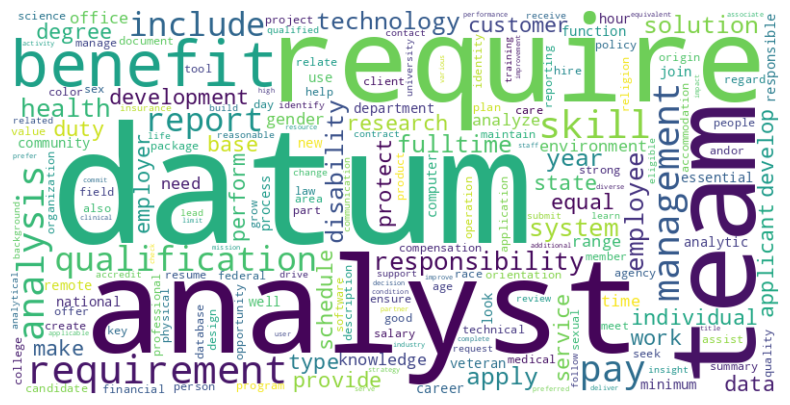

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_word_scores)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Unsupervised Learning with Latent Dirichlet Allocation (LDA)

### What is LDA?
Latent Dirichlet Allocation (LDA) is a generative probabilistic model used for topic modeling. It assumes that each document is a mixture of topics and that each topic is a mixture of words. The goal of LDA is to infer the hidden topic structure from the observed words in the documents.

### What is the model doing in the background?

- Imagine we have a bunch of job descriptions, but they contain some common, unimportant words like "the," "and," or "company." The first step is to remove these words to focus on the more important ones.

- After cleaning, each job description is broken down into individual words.

- We create a list where each unique word gets a unique ID number. This is like making a dictionary where each word has a number next to it.

- We tell the model how many categories (topics) we want to find. The model then tries to group the words into these topics. It does this by looking at the words in all the job descriptions and figuring out which words often appear together.

- The model goes through the text multiple times to refine these groupings until it stabilizes and is satisfied with the results.

- After training, the model provides a list of topics. Each topic is represented by a group of words that frequently appear together in the job descriptions. For example, one topic might be characterized by words like "analysis," "report," and "data," indicating it's related to data analysis tasks.

In [55]:
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel

# Define stop words to exclude
stop_words = set(stopwords.words('english')).union(set([
    'datum', 'work', 'experience', 'year', 'job', 'business', 'require',
    'position', 'include', 'support', 'provide', 'opportunity',
    'status', 'employee', 'role', 'applicant', 'company', 'candidate',
    'process', 'project', 'information', 'responsibility',
    'service', 'system', 'use', 'skill', 'requirement', 'ability', 'client',
    'location', 'level', 'education', 'benefit', 'qualification',
    'application', 'need', 'program', 'offer', 'employment',
    'duty', 'pay', 'range'
]))

# Preprocess the text to remove stop words
def preprocess(text):
    return [word for word in text if word not in stop_words]

common_texts = df1['cleaned_job_desc'].map(str).str.split().apply(preprocess).tolist()

common_dictionary = Dictionary(common_texts)
common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

num_topics= 15

lda = LdaModel(common_corpus, num_topics = num_topics, id2word=common_dictionary, passes=50)

### Topic Results

Topic: 0 
Words: 0.011*"team" + 0.007*"compensation" + 0.006*"employer" + 0.006*"analyst" + 0.006*"disability" + 0.005*"technology" + 0.005*"product" + 0.005*"part" + 0.005*"equal" + 0.005*"make"

Topic: 1 
Words: 0.012*"report" + 0.010*"analysis" + 0.009*"perform" + 0.009*"management" + 0.008*"analyst" + 0.008*"knowledge" + 0.006*"office" + 0.005*"analyze" + 0.005*"assist" + 0.005*"state"

Topic: 2 
Words: 0.020*"college" + 0.019*"degree" + 0.019*"accredit" + 0.018*"field" + 0.017*"computer" + 0.017*"science" + 0.013*"protect" + 0.013*"title" + 0.013*"fulltime" + 0.012*"university"

Topic: 3 
Words: 0.016*"federal" + 0.014*"document" + 0.013*"apply" + 0.012*"complete" + 0.011*"base" + 0.010*"resume" + 0.010*"meet" + 0.009*"accredit" + 0.009*"receive" + 0.009*"submit"

Topic: 4 
Words: 0.019*"state" + 0.009*"reporting" + 0.009*"federal" + 0.007*"product" + 0.007*"customer" + 0.006*"base" + 0.006*"team" + 0.006*"ensure" + 0.005*"functional" + 0.005*"well"

Topic: 5 
Words: 0.015*"examin

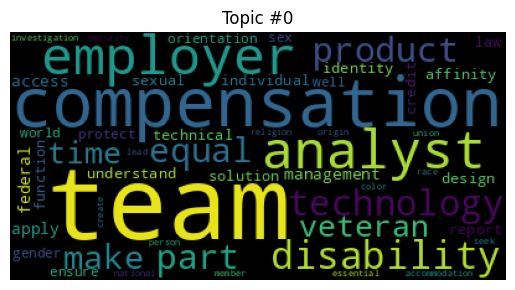

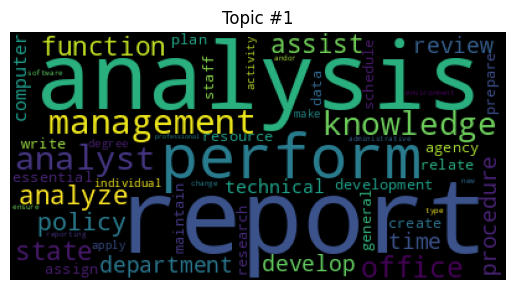

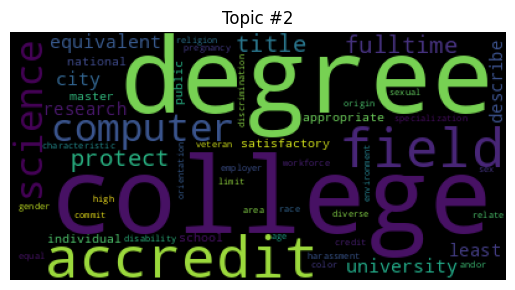

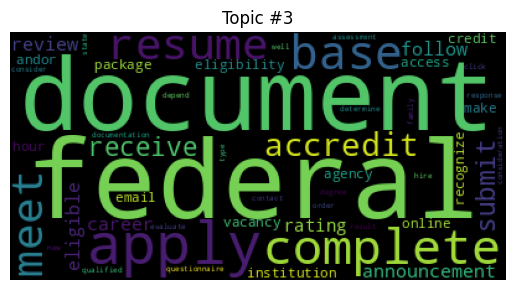

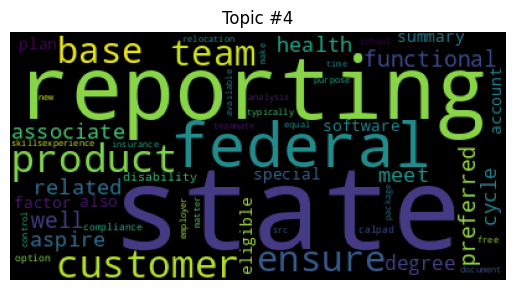

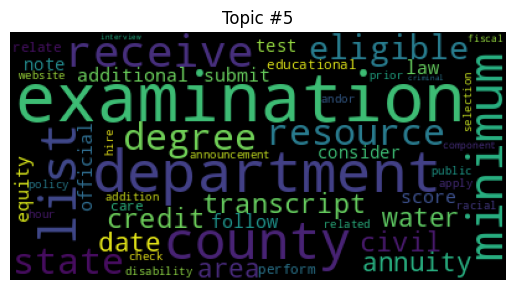

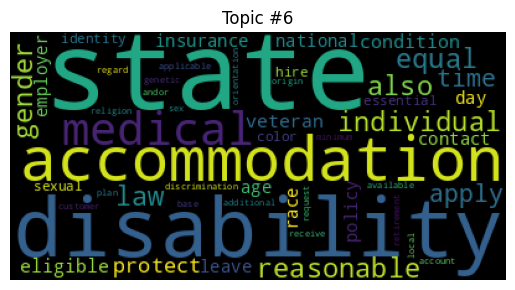

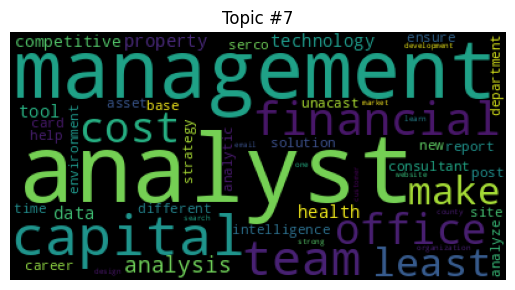

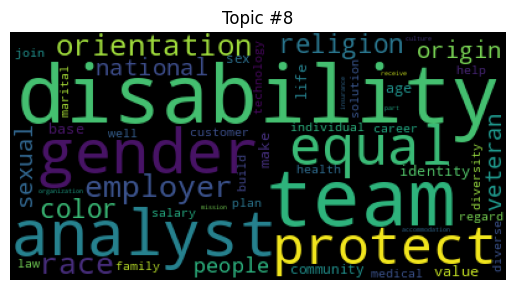

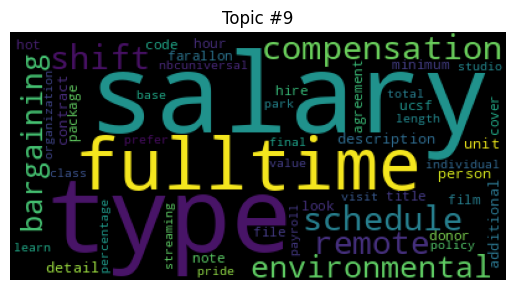

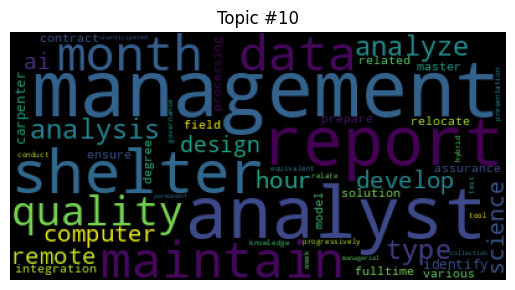

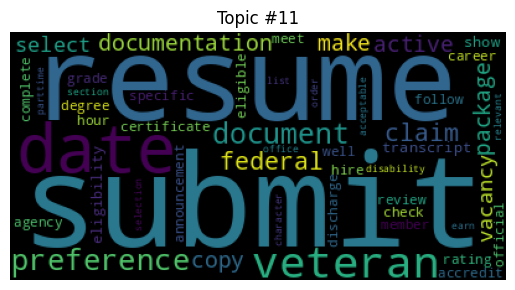

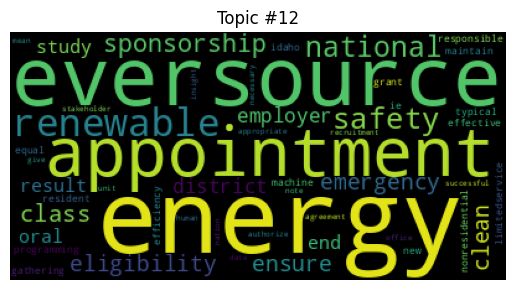

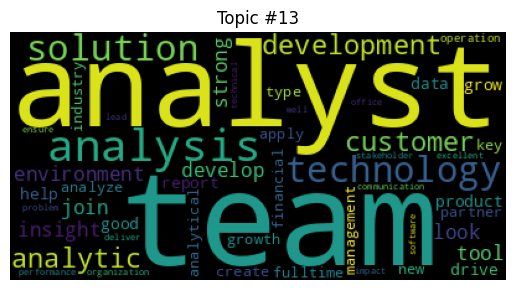

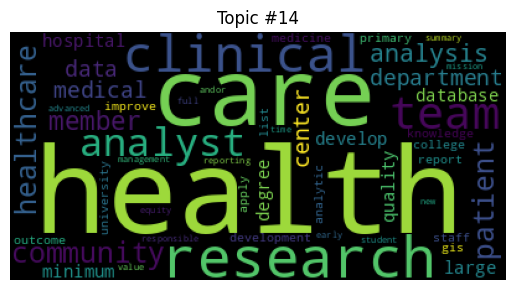

In [56]:
# Display the topics
for idx, topic in lda.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}\n")

# Visualize the topics using word clouds
for t in range(lda.num_topics):
    plt.figure()
    plt.imshow(WordCloud().fit_words(dict(lda.show_topic(t, 50))))
    plt.axis("off")
    plt.title(f"Topic #{t}")
    plt.show()



> Key Takeaways - Most Important Topics:

-- Topic #1: "report, analysis, perform, management, analyst, knowledge, office, analyze, assist, state"
- This topic clearly aligns with the typical responsibilities of a data analyst, including generating reports, performing data analysis, managing data-related tasks, and assisting with analytical needs.

-- Topic #10: "management, analyst, report, shelter, maintain, data, month, quality, analysis, type"
- This topic is highly relevant to data analysts, focusing on management, reporting, data maintenance, and quality analysis.


> Additionally, Topics #7 & #13 highlight important aspects like financial analysis, team collaboration, and technological solutions, which are also crucial for data analysts.